In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv("stat.csv")

In [4]:
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Education level', 'Field of occupation',
       'Occupation level', 'Country of Residence',
       'Which of the following mobile phone app uses AI in its operations',
       'Can an AI tool determine if you have risk of Pneumonia by examining your chest x-rays?',
       'When you try to unlock your mobile phone using a pin, does an underline AI tool make that decision?',
       'Think about the advertisements you see when you are on the internet. Are those selected by AI tools?',
       'Assume that an AI system makes decisions for you in your day-to-day activities. How important is it to know the reasons behind such decisions?',
       'Assume that an AI system makes decisions for you in your day-to-day activities. When do you need an explanation for such a decision?',
       'A person is discharged from the hospital after a hospital stay of more than a week. An AI system predicts that he will be readmitted within the next 30 days.',
       'An o

In [5]:
df_xt = df[['Gender','Age','Education level','Field of occupation', 'Occupation level','Assume that an AI system makes decisions for you in your day-to-day activities. How important is it to know the reasons behind such decisions?']]

In [6]:
df_xt.head()

,Gender,Age,Education level,Field of occupation,Occupation level,Assume that an AI system makes decisions for you in your day-to-day activities. How important is it to know the reasons behind such decisions?
0,Female,31,Completed Undergraduate Degree,Architecture and Engineering,Entry level,Very important
1,Female,24,Completed Undergraduate Degree,Unoccupied,Unoccupied,Important
2,Female,31,Completed Undergraduate Degree,Computer and Mathematical,Student,Neutral
3,Female,26,Completed Undergraduate Degree,Computer and Mathematical,Unoccupied,Important
4,Male,32,Completed Undergraduate Degree,Other,Executive level,Very important


In [7]:
df_xt.iloc[:,-1].unique()

array(['Very important', 'Important', 'Neutral', 'Not important',
       'Not important at all'], dtype=object)

In [8]:
perceived_importance_mapping = {
    'Very important': 5,
    'Important': 4,
    'Neutral': 3,
    'Not important': 2,
    'Not important at all': 1
}
df_xt['Perceived_Importance'] = df_xt['Assume that an AI system makes decisions for you in your day-to-day activities. How important is it to know the reasons behind such decisions?'].map(perceived_importance_mapping)
df_xt.drop(columns=['Assume that an AI system makes decisions for you in your day-to-day activities. How important is it to know the reasons behind such decisions?'], inplace=True)

df_xt.head()

C:\Users\MSI\AppData\Local\Temp/ipykernel_6196/3692059414.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xt['Perceived_Importance'] = df_xt['Assume that an AI system makes decisions for you in your day-to-day activities. How important is it to know the reasons behind such decisions?'].map(perceived_importance_mapping)
C:\Users\MSI\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Gender,Age,Education level,Field of occupation,Occupation level,Perceived_Importance
0,Female,31,Completed Undergraduate Degree,Architecture and Engineering,Entry level,5
1,Female,24,Completed Undergraduate Degree,Unoccupied,Unoccupied,4
2,Female,31,Completed Undergraduate Degree,Computer and Mathematical,Student,3
3,Female,26,Completed Undergraduate Degree,Computer and Mathematical,Unoccupied,4
4,Male,32,Completed Undergraduate Degree,Other,Executive level,5


# Descriptive Analysis

In [34]:
import pandas as pd

# Calculate frequency, cumulative frequency, mode, and median for each categorical feature
edu_freq_table = df['Education level'].value_counts()
edu_cum_freq_table = edu_freq_table.cumsum()
edu_total = len(df['Education level'])
edu_norm_freq_table = edu_freq_table / edu_total
edu_norm_cum_freq_table = edu_cum_freq_table / edu_total
mode_edu = df['Education level'].mode()[0]
# median_edu = df['Education level'].median()

# Display the results
print("Frequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of 'Edu level'")
print("Frequency: \n",edu_freq_table)
print("------------------------------------------------------")
print("Normalized Frequency: \n",edu_norm_freq_table)
print("------------------------------------------------------")
print("Cumulative Frequency : \n",edu_cum_freq_table)
print("------------------------------------------------------")
print("Normalized Cumulative Frequency: \n",edu_norm_cum_freq_table)
print("------------------------------------------------------")
print("Mode: ", mode_edu)
print("------------------------------------------------------")
# print("Median: ", median_edu)

KeyError: 0

In [35]:
occup_lvl_freq_table = df_xt['Occupation level'].value_counts()
occup_lvl_cum_freq_table = occup_lvl_freq_table.cumsum()
occup_lvl_total = len(df_xt['Occupation level'])
occup_lvl_norm_freq_table = occup_lvl_freq_table / occup_lvl_total
occup_lvl_norm_cum_freq_table = occup_lvl_cum_freq_table / occup_lvl_total
mode_occup_lvl = df_xt['Occupation level'].mode()[0]
# median_occup = df_xt['Occupation level'].median()



print("\nFrequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of 'Occup level'")
print("------------------------------------------------------")
print(occup_lvl_freq_table)
print("------------------------------------------------------")
print(occup_lvl_norm_freq_table)
print("------------------------------------------------------")
print(occup_lvl_cum_freq_table)
print("------------------------------------------------------")
print(occup_lvl_norm_cum_freq_table)
print("------------------------------------------------------")
print("Mode: ", mode_occup_lvl)
# print("Median: ", median_occup)




Frequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of 'Occup level'
------------------------------------------------------
Middle level        81
Unoccupied          57
Management level    56
Executive level     48
Entry level         39
Student             10
Researcher           9
Senior Engineer      9
Lecturer             4
Senior Lecturer      3
Mid level            3
Lecturer             1
Name: Occupation level, dtype: int64
------------------------------------------------------
Middle level        0.253125
Unoccupied          0.178125
Management level    0.175000
Executive level     0.150000
Entry level         0.121875
Student             0.031250
Researcher          0.028125
Senior Engineer     0.028125
Lecturer            0.012500
Senior Lecturer     0.009375
Mid level           0.009375
Lecturer            0.003125
Name: Occupation level, dtype: float64
------------------------------------------------------
Middle level         81
Un

In [36]:
per_imp_freq_table = df_xt['Perceived_Importance'].value_counts()
per_imp_cum_freq_table = per_imp_freq_table.cumsum()
per_imp_total = len(df_xt['Perceived_Importance'])
per_imp_norm_freq_table = per_imp_freq_table / per_imp_total
per_imp_norm_cum_freq_table = per_imp_cum_freq_table / per_imp_total
mode_importance = df_xt['Perceived_Importance'].mode()[0]
# median_importance = df_xt['Perceived_Importance'].median()

print("\nFrequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of 'Importance'")
print("------------------------------------------------------")
print(per_imp_freq_table)
print("------------------------------------------------------")
print(per_imp_norm_freq_table)
print("------------------------------------------------------")
print(per_imp_cum_freq_table)
print("------------------------------------------------------")
print(per_imp_norm_cum_freq_table)
print("------------------------------------------------------")
print("Mode: ", mode_importance)
print("------------------------------------------------------")
# print("Median: ", median_importance)


Frequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of 'Importance'
------------------------------------------------------
5    151
4    128
3     36
1      3
2      2
Name: Perceived_Importance, dtype: int64
------------------------------------------------------
5    0.471875
4    0.400000
3    0.112500
1    0.009375
2    0.006250
Name: Perceived_Importance, dtype: float64
------------------------------------------------------
5    151
4    279
3    315
1    318
2    320
Name: Perceived_Importance, dtype: int64
------------------------------------------------------
5    0.471875
4    0.871875
3    0.984375
1    0.993750
2    1.000000
Name: Perceived_Importance, dtype: float64
------------------------------------------------------
Mode:  5
------------------------------------------------------


# Visualizing 

Occupation level

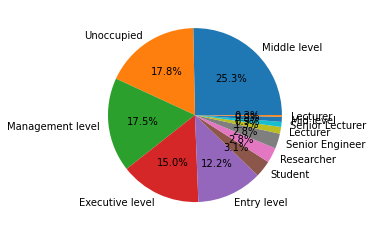

In [37]:
plt.pie(occup_lvl_freq_table, labels=occup_lvl_freq_table.index, autopct='%1.1f%%')

# Show the plot
plt.show()

Eduacation level

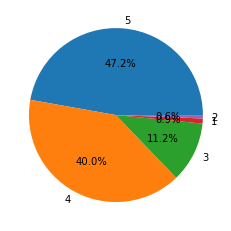

In [40]:
plt.pie(per_imp_freq_table, labels=per_imp_freq_table.index, autopct='%1.1f%%')

# Show the plot
plt.show()

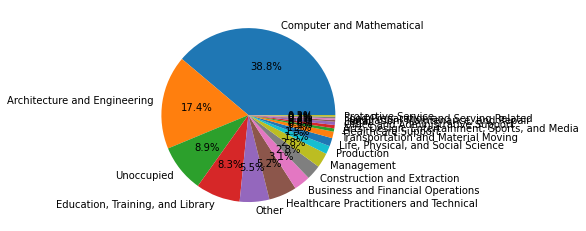

In [122]:
occup_freq_table = df['Field of occupation'].value_counts()
plt.pie(occup_freq_table, labels=occup_freq_table.index, autopct='%1.1f%%')

# Show the plot
plt.show()


In [43]:
gender_freq_table = df_xt['Gender'].value_counts()
# gender_cum_freq_table = gender_freq_table.cumsum()
gender_total = len(df_xt['Gender'])
gender_norm_freq_table = gender_freq_table / per_imp_total
# gender_norm_cum_freq_table = gender_cum_freq_table / per_imp_total
mode_importance = df_xt['Gender'].mode()[0]
# median_importance = df_xt['Perceived_Importance'].median()
print("\nFrequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of 'Importance'")
print("------------------------------------------------------")
print(gender_freq_table)
print("------------------------------------------------------")
print(gender_norm_freq_table)
print("------------------------------------------------------")
# print(per_imp_cum_freq_table)
print("------------------------------------------------------")
# print(per_imp_norm_cum_freq_table)
print("------------------------------------------------------")
print("Mode: ", mode_importance)
print("------------------------------------------------------")
# print("Median: ", median_importance)


Frequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of 'Importance'
------------------------------------------------------
0    171
1    149
Name: Gender, dtype: int64
------------------------------------------------------
0    0.534375
1    0.465625
Name: Gender, dtype: float64
------------------------------------------------------
------------------------------------------------------
------------------------------------------------------
Mode:  0
------------------------------------------------------


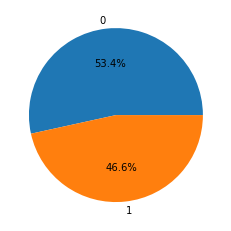

In [44]:
plt.pie(gender_freq_table, labels=gender_freq_table.index, autopct='%1.1f%%')

# Show the plot
plt.show()

Frequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of Age Ranges and Gender
Gender     Female  Male  Prefer not to say
Age Range                                 
10-20           0     1                  0
21-30          58    73                  1
31-40          90    85                  0
41-50           3     7                  0
51-60           1     3                  0
61-70           2     3                  0
Gender       Female      Male  Prefer not to say
Age Range                                       
10-20      0.000000  0.003058           0.000000
21-30      0.177370  0.223242           0.003058
31-40      0.275229  0.259939           0.000000
41-50      0.009174  0.021407           0.000000
51-60      0.003058  0.009174           0.000000
61-70      0.006116  0.009174           0.000000
Gender     Female  Male  Prefer not to say
Age Range                                 
10-20           0     1                  0
21-30          58  

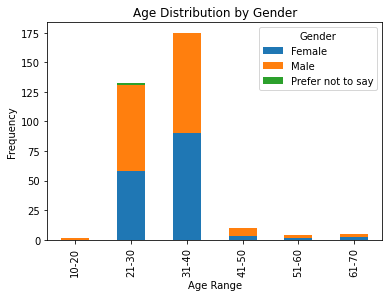

In [47]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Define age ranges
age_ranges = pd.cut(df['Age'], bins=[10,20, 30, 40, 50,60,70], labels=['10-20', '21-30', '31-40', '41-50', '51-60','61-70'])

# Create a new DataFrame with age ranges and gender
age_df = pd.DataFrame({'Age Range': age_ranges, 'Gender': df['Gender']})

# Calculate the frequency of each age range and gender
freq_table = pd.crosstab(index=age_df['Age Range'], columns=age_df['Gender'], margins=False)

# Calculate the cumulative frequency of each age range and gender
cum_freq_table = freq_table.cumsum(axis=0)

# Calculate the normalized frequency of each age range and gender
total = len(df['Age'])
norm_freq_table = freq_table / total

# Calculate the normalized cumulative frequency of each age range and gender
norm_cum_freq_table = cum_freq_table / total

# Display the results
print("Frequency, Normalized Frequency, Cumulative Frequency, and Normalized Cumulative Frequency of Age Ranges and Gender")
print(freq_table)
print(norm_freq_table)
print(cum_freq_table)
print(norm_cum_freq_table)

# Plot the bar chart
freq_table.plot(kind='bar', stacked=True)
plt.title('Age Distribution by Gender')
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.show()

In [54]:
edu_freq_table = df['Education level'].value_counts()

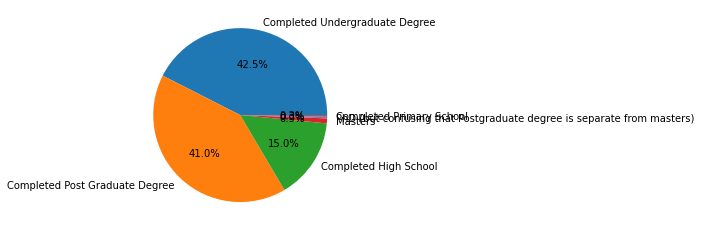

In [55]:
plt.pie(edu_freq_table, labels=edu_freq_table.index, autopct='%1.1f%%')

# Show the plot
plt.show()

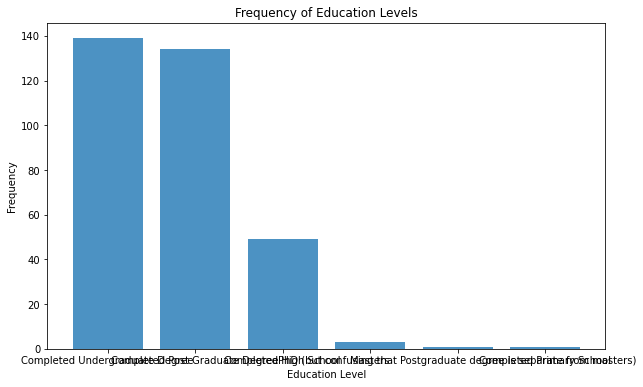

In [60]:
plt.figure(figsize=(10,6))
plt.bar(edu_freq_table.index, edu_freq_table.values, alpha=0.8)
plt.title('Frequency of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [57]:
'Country of Residence'

'Country of Residence'

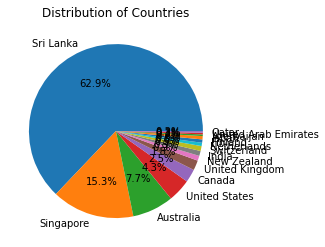

In [84]:
country_freq_table = df['Country of Residence'].value_counts()
plt.pie(country_freq_table, labels=country_freq_table.index, autopct='%1.1f%%')
plt.title('Distribution of Countries')
# Show the plot
plt.show()

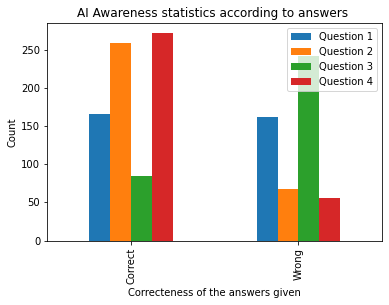

In [87]:
import matplotlib.pyplot as plt

columns = ['Which of the following mobile phone app uses AI in its operations',
           'Can an AI tool determine if you have risk of Pneumonia by examining your chest x-rays?',
           'When you try to unlock your mobile phone using a pin, does an underline AI tool make that decision?',
           'Think about the advertisements you see when you are on the internet. Are those selected by AI tools?']


AI_Awareness = pd.DataFrame()
# Create a new column to group the values
AI_Awareness['Question 1'] = df['Which of the following mobile phone app uses AI in its operations'].apply(lambda x: 'Correct' if x == 'Email' else 'Wrong')
AI_Awareness['Question 2'] = df['Can an AI tool determine if you have risk of Pneumonia by examining your chest x-rays?'].apply(lambda x: 'Correct' if x == 'Yes' else 'Wrong')
AI_Awareness['Question 3'] = df['When you try to unlock your mobile phone using a pin, does an underline AI tool make that decision?'].apply(lambda x: 'Correct' if x == 'Yes' else 'Wrong')
AI_Awareness['Question 4'] = df['Think about the advertisements you see when you are on the internet. Are those selected by AI tools?'].apply(lambda x: 'Correct' if x == 'Yes' else 'Wrong')

# Count the occurrences of each value
AI_awareness_counts = AI_Awareness.apply(pd.Series.value_counts)

AI_awareness_counts.plot(kind='bar')
plt.xlabel('Correcteness of the answers given')
plt.ylabel('Count')
plt.title('AI Awareness statistics according to answers ')
plt.show()

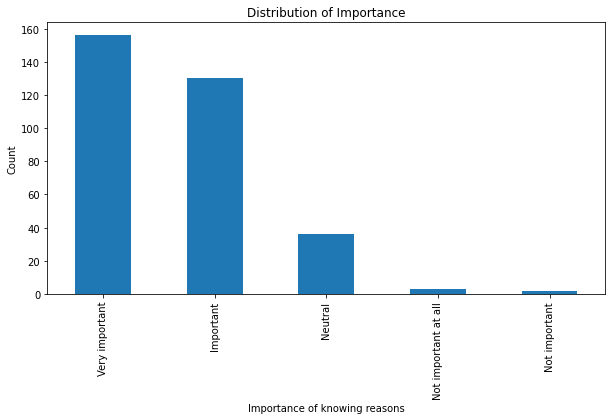

In [92]:
import matplotlib.pyplot as plt

# Plot the distribution of "How important is it to know the reasons behind such decisions?"
plt.figure(figsize=(10, 5))

df['Assume that an AI system makes decisions for you in your day-to-day activities. How important is it to know the reasons behind such decisions?'].value_counts().plot(kind='bar')
plt.xlabel('Importance of knowing reasons')
plt.ylabel('Count')
plt.title('Distribution of Importance')
plt.show()
# Plot the distribution of "When do you need an explanation for such a decision?"


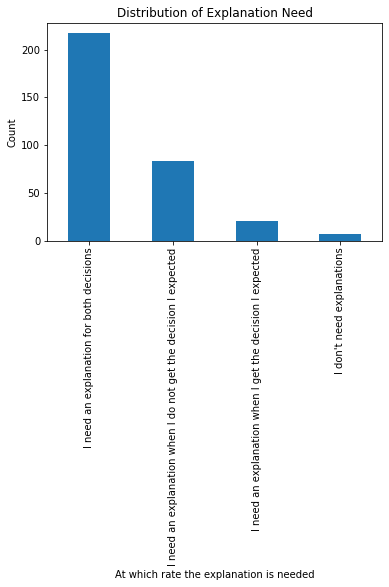

In [93]:

df['Assume that an AI system makes decisions for you in your day-to-day activities. When do you need an explanation for such a decision?'].value_counts().plot(kind='bar')
plt.xlabel('At which rate the explanation is needed')
plt.ylabel('Count')
plt.title('Distribution of Explanation Need')

plt.show()


In [113]:
dataset = pd.read_csv("stat.csv")

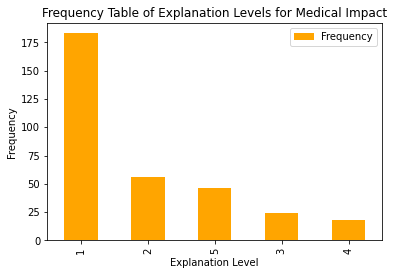

In [64]:
# Calculate the frequency of each level of explanation needed for medical impact
m_freq_table = df['Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Medical impact]'].value_counts().reset_index()

# Rename the columns of the frequency table
m_freq_table = m_freq_table.rename(columns={'index': 'Explanation Level', 'Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Medical impact]': 'Frequency'})

# Create a bar chart from the frequency table
m_freq_table.plot(kind='bar', x='Explanation Level', y='Frequency', color='orange')
plt.xlabel('Explanation Level')
plt.ylabel('Frequency')
plt.title('Frequency Table of Explanation Levels for Medical Impact')
plt.show()

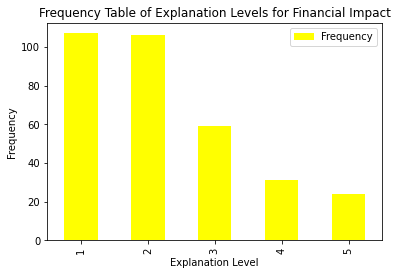

In [66]:
f_freq_table = df['Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Financial impact]'].value_counts().reset_index()

# Rename the columns of the frequency table
f_freq_table = f_freq_table.rename(columns={'index': 'Explanation Level', 'Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Financial impact]': 'Frequency'})

# Create a bar chart from the frequency table
f_freq_table.plot(kind='bar', x='Explanation Level', y='Frequency', color='yellow')
plt.xlabel('Explanation Level')
plt.ylabel('Frequency')
plt.title('Frequency Table of Explanation Levels for Financial Impact')
plt.show()

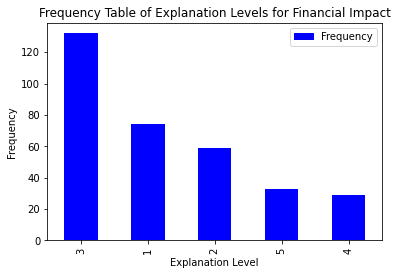

In [70]:
l_freq_table = df['Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Legal impact]'].value_counts().reset_index()

# Rename the columns of the frequency tablel
l_freq_table = l_freq_table.rename(columns={'index': 'Explanation Level', 'Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Legal impact]': 'Frequency'})

# Create a bar chart from the frequency table
l_freq_table.plot(kind='bar', x='Explanation Level', y='Frequency', color='blue')
plt.xlabel('Explanation Level')
plt.ylabel('Frequency')
plt.title('Frequency Table of Explanation Levels for Legal Impact')
plt.show()

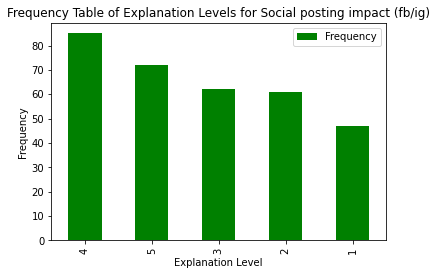

In [72]:
s_freq_table = df['Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Social posting  impact (fb/ig)]'].value_counts().reset_index()

# Rename the columns of the frequency tablel
s_freq_table = s_freq_table.rename(columns={'index': 'Explanation Level', 'Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Social posting  impact (fb/ig)]': 'Frequency'})

# Create a bar chart from the frequency table
s_freq_table.plot(kind='bar', x='Explanation Level', y='Frequency', color='green')
plt.xlabel('Explanation Level')
plt.ylabel('Frequency')
plt.title('Frequency Table of Explanation Levels for Social posting impact (fb/ig)')
plt.show()

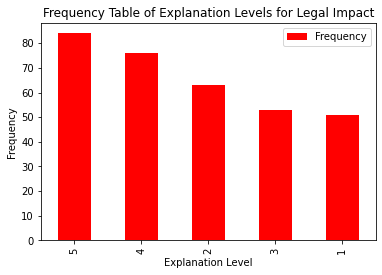

In [74]:
t_freq_table = df['Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Time Wasted]'].value_counts().reset_index()

# Rename the columns of the frequency tablel
t_freq_table = t_freq_table.rename(columns={'index': 'Explanation Level', 'Decisions made by different AI systems may have different impacts on you, e.g., financial impact or medical impact. AI systems with which impact needs the most explanations? Rank from the impact that needs the most explanation to the least. (1 - most, 5 - least). [Time Wasted]': 'Frequency'})

# Create a bar chart from the frequency table
t_freq_table.plot(kind='bar', x='Explanation Level', y='Frequency', color='red')
plt.xlabel('Explanation Level')
plt.ylabel('Frequency')
plt.title('Frequency Table of Explanation Levels for Time Wasted')
plt.show()

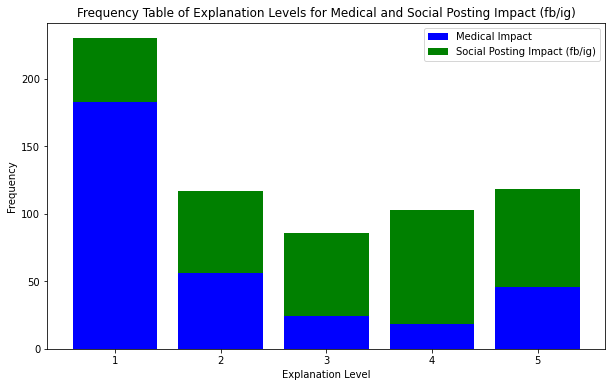

In [82]:
combined_df = pd.concat([m_freq_table,l_freq_table, f_freq_table, s_freq_table, t_freq_table], ignore_index= True)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(freq_table['Explanation Level'], freq_table['Frequency_medical'], color='blue')
ax.bar(freq_table['Explanation Level'], freq_table['Frequency_social'], bottom=freq_table['Frequency_medical'], color='green')
ax.set_xlabel('Explanation Level')
ax.set_ylabel('Frequency')
ax.set_title('Frequency Table of Explanation Levels for Medical and Social Posting Impact (fb/ig)')
ax.legend(['Medical Impact', 'Social Posting Impact (fb/ig)'])
plt.show()



WordCloud

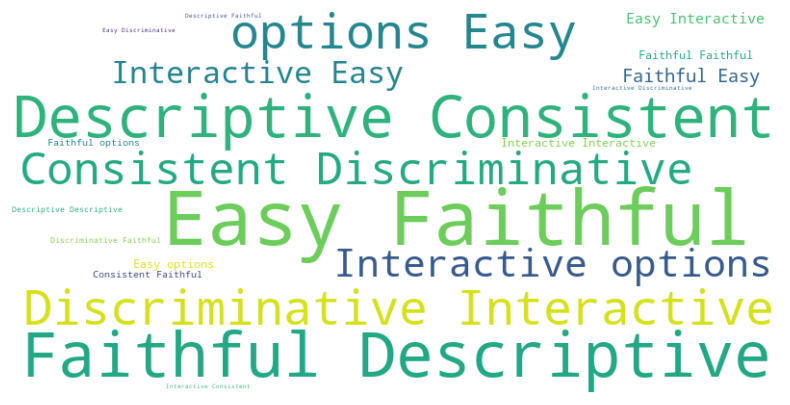

In [4]:
import re

df["I expect explanations to be"].fillna("", inplace=True)
explanations = ' '.join(df["I expect explanations to be"])

df["I expect explanations to be"].fillna("", inplace=True)
pattern = r'\b(Easy|Faithful|Descriptive|Consistent|Discriminative|Interactive|Transparent|Infrequent|options)\b'
matching_terms = re.findall(pattern,explanations)
filtered_string = ', '.join(matching_terms)

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_string)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()